# Price second-hand's car

In [1]:
import os
user_name = os.getlogin()
path =  "D:\Technocite\DATASETS PROJET\Second-hand-car"
import pandas as pd
import numpy as np

In [2]:
audi = pd.read_csv(path + '/audi.csv')
audi=audi.assign(brand='Audi')
bmw = pd.read_csv(path + '/bmw.csv')
bmw=bmw.assign(brand='BMW')
mercedes_cclass = pd.read_csv(path + '/cclass.csv')
mercedes_cclass=mercedes_cclass.assign(brand='mercedes')
focus = pd.read_csv(path + '/focus.csv')
focus=focus.assign(brand='ford')
ford = pd.read_csv(path + '/ford.csv')
ford=ford.assign(brand='ford')
hyundai = pd.read_csv(path + '/hyundi.csv')
hyundai=hyundai.assign(brand='hyundai')
mercedes = pd.read_csv(path + '/merc.csv')
mercedes=mercedes.assign(brand='mercedes')
skoda = pd.read_csv(path + '/skoda.csv')
skoda=skoda.assign(brand='skoda')
toyota = pd.read_csv(path + '/toyota.csv')
toyota=toyota.assign(brand='toyota')
unclean_cclass = pd.read_csv(path + '/unclean_cclass.csv')
unclean_focus = pd.read_csv(path + '/unclean_focus.csv')
opel = pd.read_csv(path + '/vauxhall.csv')
opel=opel.assign(brand='opel.csv')
vw = pd.read_csv(path + '/vw.csv')
vw=vw.assign(brand='VW')

## 1.First inspecting for cleaning 

In [3]:
unclean_cclass.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [4]:
mercedes_cclass.head()

,model,year,price,transmission,mileage,fuelType,engineSize,brand
0,C Class,2020,30495,Automatic,1200,Diesel,2.0,mercedes
1,C Class,2020,29989,Automatic,1000,Petrol,1.5,mercedes
2,C Class,2020,37899,Automatic,500,Diesel,2.0,mercedes
3,C Class,2019,30399,Automatic,5000,Diesel,2.0,mercedes
4,C Class,2019,29899,Automatic,4500,Diesel,2.0,mercedes


In [5]:
unclean_cclass.shape

(4006, 11)

In [6]:
mercedes_cclass.shape

(3899, 8)

In [7]:
unclean_focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5604 entries, 0 to 5603
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5548 non-null   object 
 1   year          5459 non-null   float64
 2   price         5548 non-null   object 
 3   transmission  5548 non-null   object 
 4   mileage       4729 non-null   object 
 5   fuel type     2188 non-null   object 
 6   engine size   5503 non-null   object 
 7   mileage2      5509 non-null   object 
 8   fuel type2    4729 non-null   object 
 9   engine size2  4729 non-null   object 
 10  reference     5548 non-null   object 
dtypes: float64(1), object(10)
memory usage: 481.7+ KB


In [8]:
focus.head()

,model,year,price,transmission,mileage,fuelType,engineSize,brand
0,Focus,2016,8000,Manual,38852,Petrol,1.0,ford
1,Focus,2019,13400,Manual,11952,Petrol,1.0,ford
2,Focus,2019,14600,Manual,22142,Petrol,1.5,ford
3,Focus,2016,9450,Manual,14549,Diesel,1.6,ford
4,Focus,2015,9999,Manual,7010,Diesel,1.6,ford


In [9]:
unclean_focus.shape

(5604, 11)

In [10]:
focus.shape

(5454, 8)

In [11]:
brands_list = [audi, bmw,mercedes, mercedes_cclass, focus,ford, hyundai,skoda,toyota,opel,vw]
df = pd.concat(brands_list, ignore_index = False)
df = pd.DataFrame(df)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,VW,NaN
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,VW,NaN
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,VW,NaN
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,VW,NaN


## 2. Statistics

### 2.1. Correlation Statistics

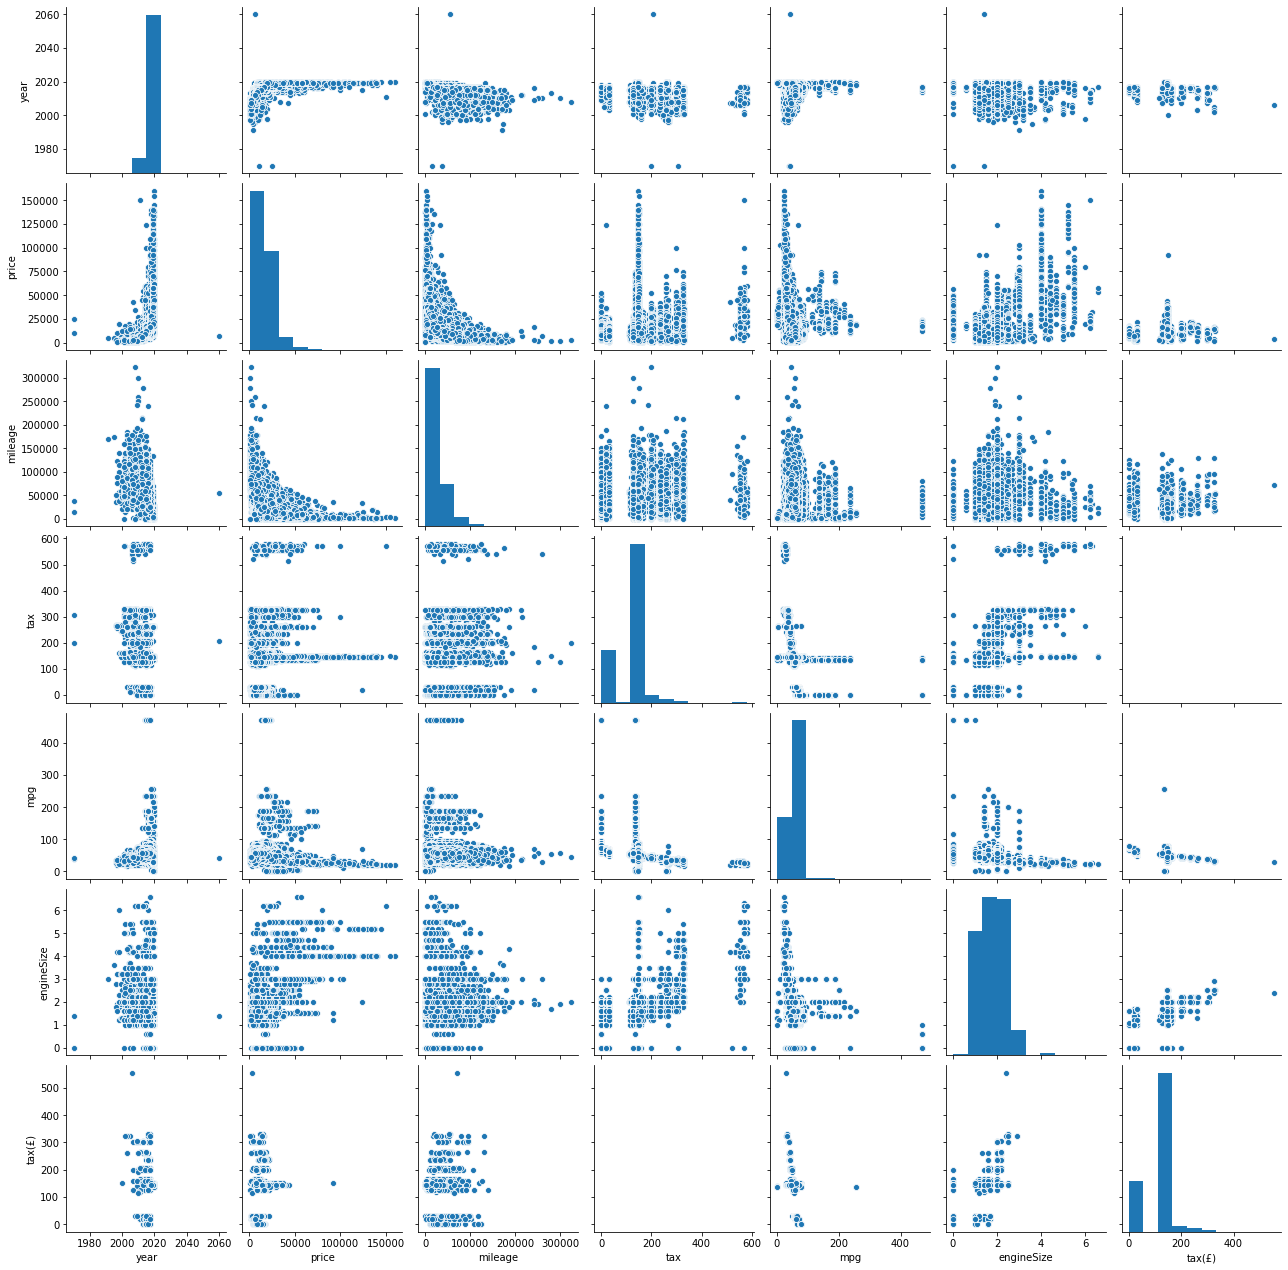

In [12]:
import seaborn as sns
sns.font_scale = 2
sns.pairplot(df)

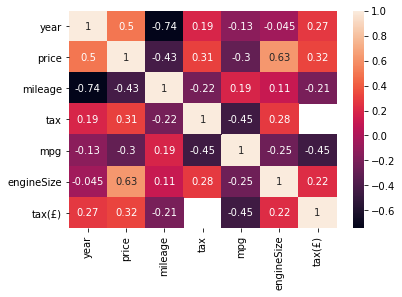

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)

In [14]:
import matplotlib.pyplot as plt
y = df.var(axis=0)
print(y)

year          4.537143e+00
price         9.518474e+07
mileage       4.484409e+08
tax           4.020169e+03
mpg           2.604519e+02
engineSize    3.103131e-01
tax(£)        3.364382e+03
dtype: float64


### 2.2. The sales prices by brand

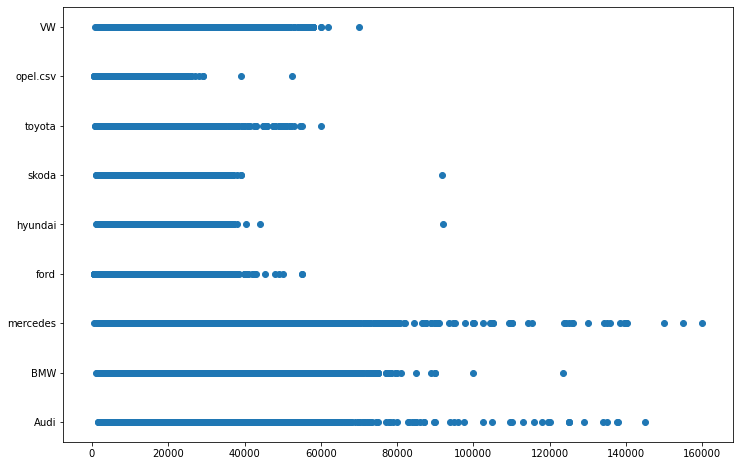

In [15]:
import matplotlib.pyplot as plt
a = df['brand']
b = df['price']
plt.figure(figsize=(12,8))
plt.scatter(b,a)

### 2.3. The sales prices by model

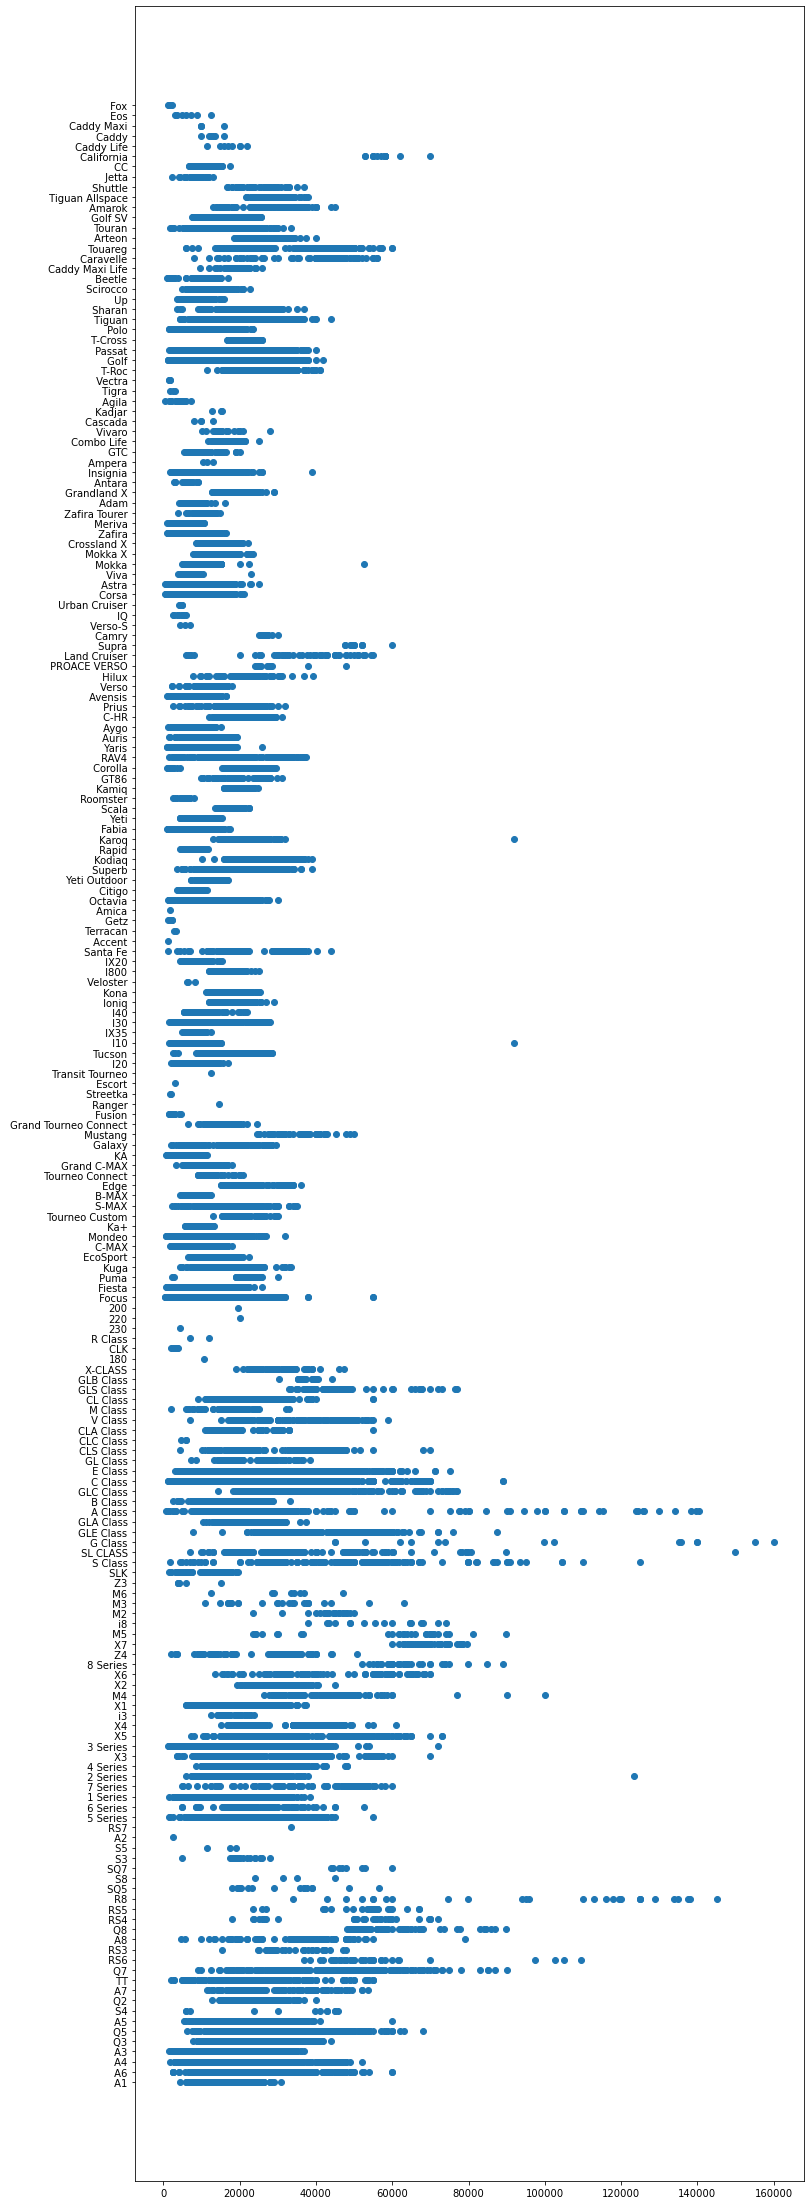

In [16]:
import matplotlib.pyplot as plt
a = df['model']
b = df['price']
plt.figure(figsize=(12,40))
plt.scatter(b, a)

### 2.4. The brands car count by fuel type 

In [17]:
#from matplotlib import pyplot
#import seaborn as sns
#fig, ax = pyplot.subplots(figsize=(12,8))
#sns.countplot(x='brand', hue='fuelType', data=df)

### 2.5. The brands car count by mpg (miles per gallon)

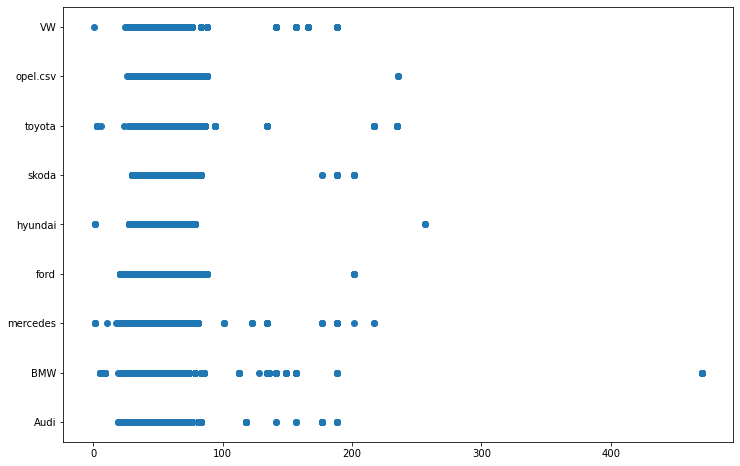

In [18]:
import matplotlib.pyplot as plt
a = df['brand']
b = df['mpg']
plt.figure(figsize=(12,8))
plt.scatter(b, a)

### 2.6. general statistics

In [19]:
df.describe()

,year,price,mileage,tax,mpg,engineSize,tax(£)
count,108540.000000,108540.000000,108540.000000,94327.000000,99187.000000,108540.000000,4860.000000
mean,2017.098028,16890.124046,23025.928469,120.256183,55.166825,1.661644,121.147119
std,2.130057,9756.266820,21176.423684,63.404805,16.138522,0.557058,58.003289
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000,125.000000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000,145.000000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000,145.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,555.000000


## 3. Categorical Variables

### 3.1 categorical variables : Listing 

In [20]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['model', 'transmission', 'fuelType', 'brand']


#### 3.1.1 Visualization unique variable

In [21]:
df.nunique()

model             195
year               29
price           13299
transmission        4
mileage         42314
fuelType            5
tax                48
mpg               208
engineSize         42
brand               9
tax(£)             24
dtype: int64

#### 3.1.2 Visualization unique's sections for categorial variables

In [22]:
df[object_cols].nunique()

model           195
transmission      4
fuelType          5
brand             9
dtype: int64

In [23]:
df['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7',
       ' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3', ' SLK', ' S Class', ' SL CLASS', ' G Class',
       ' GLE Class', ' GLA Class', ' A Class', ' B Class', ' GLC Class',
       ' C Class', ' E Class', ' GL Class', ' CLS Class', ' CLC Class',
       ' CLA Class', ' V Class', ' M Class', ' CL Class', ' GLS Class',
       ' GLB Class', ' X-CLASS', '180', ' CLK', ' R Class', '230', '220',
       '200', ' Focus', ' Fiesta', ' Puma', ' Kuga', ' EcoSport',
       ' C-MAX', ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX',
       ' Edge', ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy',

In [24]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [25]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [26]:
df['brand'].unique()

array(['Audi', 'BMW', 'mercedes', 'ford', 'hyundai', 'skoda', 'toyota',
       'opel.csv', 'VW'], dtype=object)

### 3.2 One-Hot Encoding method

In [27]:
df = df.drop(columns='brand')
df = pd.get_dummies(df,drop_first = False)
df

,year,price,mileage,tax,mpg,engineSize,tax(£),model_ 1 Series,model_ 2 Series,model_ 3 Series,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12500,15735,150.0,55.4,1.4,NaN,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,16500,36203,20.0,64.2,2.0,NaN,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,11000,29946,30.0,55.4,1.4,NaN,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017,16800,25952,145.0,67.3,2.0,NaN,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019,17300,1998,145.0,49.6,1.0,NaN,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,5990,74000,125.0,58.9,2.0,NaN,0,0,0,...,0,0,1,0,0,1,0,0,0,0
15153,2008,1799,88102,145.0,46.3,1.2,NaN,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15154,2009,1590,70000,200.0,42.0,1.4,NaN,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15155,2006,1250,82704,150.0,46.3,1.2,NaN,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## 4. Missing Values

### 4.1 Visualization missing values sections

In [28]:
df.isnull().any()

year                 False
price                False
mileage              False
tax                   True
mpg                   True
                     ...  
fuelType_Diesel      False
fuelType_Electric    False
fuelType_Hybrid      False
fuelType_Other       False
fuelType_Petrol      False
Length: 211, dtype: bool

Remarque: On constate qu'il y a des valeurs nulles ou manquantes dans les colonnes tax, mpg et tax(£)

### 4.2 Count missing values by features

In [29]:
df.isnull().sum()

year                     0
price                    0
mileage                  0
tax                  14213
mpg                   9353
                     ...  
fuelType_Diesel          0
fuelType_Electric        0
fuelType_Hybrid          0
fuelType_Other           0
fuelType_Petrol          0
Length: 211, dtype: int64

Remarque:
Les valeurs manquantes sur les colonnes tax et mpg sont faibles tandis que sur la colonne tax(£) elle sont importantes.
On supprime donc la colonne tax(£) qui présente un trop grand nombre de valeurs manquantes avec un ratio de 103680/108540.

In [30]:
del df['tax(£)']

### 4.3 Simple Imputer method

In [31]:
df=df.fillna(df.mean())

In [32]:
df.isnull().sum()

year                 0
price                0
mileage              0
tax                  0
mpg                  0
                    ..
fuelType_Diesel      0
fuelType_Electric    0
fuelType_Hybrid      0
fuelType_Other       0
fuelType_Petrol      0
Length: 210, dtype: int64

## 5. Feature engineering

### 5.1 aberrant variable year

In [33]:
indexNames = df[ df['year'] > 2021 ].index
df.drop(indexNames , inplace=True)

### 5.2 Conversion Livre -> Euro

In [34]:
df['price']=((df['price'])/100)*117
df

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,14625.00,15735,150.0,55.4,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,19305.00,36203,20.0,64.2,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,12870.00,29946,30.0,55.4,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017,19656.00,25952,145.0,67.3,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019,20241.00,1998,145.0,49.6,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,7008.30,74000,125.0,58.9,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
15153,2008,2104.83,88102,145.0,46.3,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15154,2009,1860.30,70000,200.0,42.0,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15155,2006,1462.50,82704,150.0,46.3,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### 5.3 Conversion Livre tax -> Euro tax

In [35]:
df['tax']=((df['tax'])/100)*117
df

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,14625.00,15735,175.50,55.4,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,19305.00,36203,23.40,64.2,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,12870.00,29946,35.10,55.4,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017,19656.00,25952,169.65,67.3,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019,20241.00,1998,169.65,49.6,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,7008.30,74000,146.25,58.9,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
15153,2008,2104.83,88102,169.65,46.3,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15154,2009,1860.30,70000,234.00,42.0,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15155,2006,1462.50,82704,175.50,46.3,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### 5.4 Conversion miles per gallon -> liter per 100 kilometer

In [36]:
df.mpg = 282.481 / df.mpg 
df = df.rename(columns = {'mpg' : 'l_100km'})
df

,year,price,mileage,tax,l_100km,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,14625.00,15735,175.50,5.098935,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,19305.00,36203,23.40,4.400016,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,12870.00,29946,35.10,5.098935,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017,19656.00,25952,169.65,4.197340,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019,20241.00,1998,169.65,5.695181,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,7008.30,74000,146.25,4.795942,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
15153,2008,2104.83,88102,169.65,6.101102,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15154,2009,1860.30,70000,234.00,6.725738,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15155,2006,1462.50,82704,175.50,6.101102,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### 5.5 Conversion mileage -> kilomètre

In [37]:
df.mileage = df.mileage * 1.60934
df = df.rename(columns = {'mileage' : 'km'})
df

,year,price,km,tax,l_100km,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,14625.00,25322.96490,175.50,5.098935,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,19305.00,58262.93602,23.40,4.400016,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,12870.00,48193.29564,35.10,5.098935,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017,19656.00,41765.59168,169.65,4.197340,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019,20241.00,3215.46132,169.65,5.695181,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,7008.30,119091.16000,146.25,4.795942,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
15153,2008,2104.83,141786.07268,169.65,6.101102,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15154,2009,1860.30,112653.80000,234.00,6.725738,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15155,2006,1462.50,133098.85536,175.50,6.101102,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## 6. Target, features & Tests ; Standardisation

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop(['price'], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 7. Models Training

### 7.1. LinearRegression

In [39]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.8459650698536086

### 7.2. RandomForest

In [40]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(max_depth = 50, n_estimators= 50, random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_train)
forest_model.score(X_test, y_test)
print(melb_preds)

[15858.765  16876.4778 14674.6314 ... 13512.9618 17149.2984 12848.7996]


## 8. Hyperparameters Tuning

### 8.1 GridSearchCV

In [41]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {  
#        'n_estimators' : np.arange(25,151,25), "max_depth" : [10, 20, 50, 100]
#}
#grid = GridSearchCV(RandomForestRegressor(),param_grid, cv=5, n_jobs = 2)
#print(grid.fit(X_train, y_train))
#print(grid.best_score_)
#print(grid.best_params_)
#model_randomforest_grid = grid.best_estimator_

#model_randomforest_grid.score(X_test, y_test)

## 9. Model predictions

In [42]:
#predictions = forest_model.predict(X_test)

In [43]:
#from sklearn.metrics import mean_squared_error 
#error_train = mean_squared_error(y_train, forest_model.predict(X_train))
#error_test = mean_squared_error(y_test, predictions)
#print(np.sqrt(error_train))
#print(np.sqrt(error_test))
#réalité et prediction
# dataframe de base + prédiction
# Je prends ma prediction et je retire ma msquarederror pour avoir mon prix le plus bas
# Puis je rajoute l'autre meansquarederror.

## 10. Estimation performance's evolution on the number of data

### 10.1 Learning curve

In [44]:
#from sklearn.model_selection import learning_curve
#N, train_score, val_score = learning_curve(forest_model, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10) ,cv = 5 )
#print(N)
#plt.plot(N, train_score.mean(axis=1), label='train')
#plt.plot(N, val_score.mean(axis=1), label='validation')
#plt.xlabel('train_sizes')
#plt.legend()

## 11.  Target price's car function

In [45]:
import joblib
from joblib import dump, load
joblib.dump(forest_model, 'randomforest_cars.joblib')

import pickle
def save(model):

    filename = 'car_model.sav'

    pickle.dump(model, open(filename, 'wb'))
    
save(forest_model)


In [46]:
df

,year,price,km,tax,l_100km,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,14625.00,25322.96490,175.50,5.098935,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,19305.00,58262.93602,23.40,4.400016,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,12870.00,48193.29564,35.10,5.098935,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017,19656.00,41765.59168,169.65,4.197340,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019,20241.00,3215.46132,169.65,5.695181,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,7008.30,119091.16000,146.25,4.795942,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
15153,2008,2104.83,141786.07268,169.65,6.101102,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15154,2009,1860.30,112653.80000,234.00,6.725738,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15155,2006,1462.50,133098.85536,175.50,6.101102,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [49]:
data_user = [2010,10000, 200, 7.0, 1.4, 'Corsa', 'Diesel', 'Automatic']
#classe dataframe
#parametriser les colonnes dans la fonction
column_name = list(df)
column_name.remove('price')
def car_predictor(data_user, column_name):  

    model = load('randomforest_cars.joblib')
    #model = pickle.load(open('car_model.sav','rb'))

    df_clean = pd.DataFrame(np.zeros((1, 209)), columns = column_name)
   
    print(df_clean.shape)
                                               
    df_clean['year'] = data_user[0]
    df_clean['km'] = data_user[1]
    df_clean['tax'] = data_user[2]
    df_clean['l_100km'] = data_user[3]
    df_clean['engineSize'] = data_user[4]
    df_clean['model_ {}'.format(data_user[5])] = 1
    df_clean['fuelType_{}'.format(data_user[6])] = 1
    df_clean['transmission_{}'.format(data_user[7])] = 1
    
    print(df_clean.shape)
    #print(list(df_clean))
    X = df_clean.values.reshape(1,209)
    
   
    
    
    
    result_prediction_price_car = model.predict(X)
    print("Le prix de votre voiture est estimé à : ")
    print(round(result_prediction_price_car[0],2))

   
    

In [50]:
car_predictor(data_user,column_name)

(1, 209)
(1, 209)
Le prix de votre voiture est estimé à : 
6957.62


In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title='cars data', explorative=True)
#profile.to_file('cars.html')